In [1]:
from transformers import GPT2LMHeadModel
from matplotlib import pyplot as plt

In [2]:
model = GPT2LMHeadModel.from_pretrained('gpt2')  # Load pre-trained model 124M

sd_hf = model.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

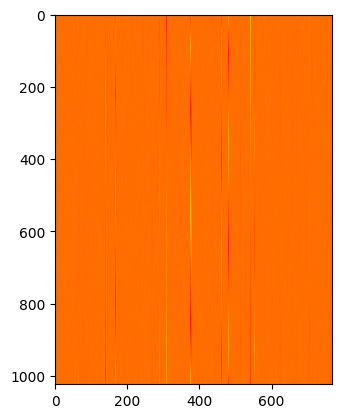

In [4]:
%matplotlib inline
plt.imshow(sd_hf["transformer.wpe.weight"], cmap='hot', interpolation='nearest')

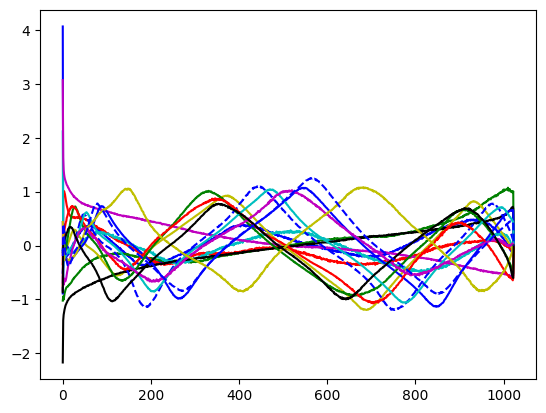

In [5]:
import matplotlib.pyplot as plt

# Show different channel
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b--']*2
idx = [_ for _ in range(768) if sd_hf["transformer.wpe.weight"][:,_].abs().max().item() > 1][:20]
for i, c in zip(idx, colors):
    plt.plot(sd_hf["transformer.wpe.weight"][:,i].detach().numpy(), c)
